# **Chapter 4. Python 을 활용한 데이터 시각화** 






---
### **학습 목표**
> 4-1. matplotlib 이란? <br>
> 4-2. matplotlib 구성 요소와 기본 그래프 <br>
> 4-3. matplotlib 그래프 유형 별 시각화 <br>
> 4-4. seaborn 이란? <br>
> 4-5. matplotlib 과 seaborn <br>
> **4-6. seaborn 그래프 유형 별 시각화** <br>
> 4-7. folium 이란? <br>
> 4-8. folium 기본 사용법 <br>
> 4-9. folium 지도 데이터 시각화 실습

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [ ]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## 4-6. seaborn 그래프 유형 별 시각화

> - 이번 시간에는 **seaborn 에서 자주 사용되는 그래프 유형**을 알아보겠습니다.
> - matplotlib 의 그래프는 모두 호환이 되므로, **seaborn 만이 가지고 있는 그래프 유형**을 위주로 소개하겠습니다.
> - seaborn 은 기본적인 플롯팅 외에, **유용한 통계값들을 같이 표현**할 수 있습니다.
> - 또 여러가지 **그래프 유형을 겹쳐서도 표현**이 가능합니다.
> - 1. 기본/통계형 그래프 - **`relplot`**, **`lmplot`**, **`countplot`**, **`distplot`**, **`heatmap`**, **`catplot`**
> - 2. 다차원 그래프 - **`pairplot`**
> - 3. 복합 그래프 - **`jointplot`**

In [ ]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

> ###  **4-6-1. 기본/통계형 그래프**

> **relplot()**
> - **라인 그래프(`lineplot`)와 산점도(`scatterplot`) 를 모두 그릴 수 있는** 방법입니다.
> - **`hue` 옵션을 통해 색상을 구분**할 수 있습니다.
> - **`col` 옵션을 통해 다중 그래프를 자동**으로 그릴 수 있습니다.

In [ ]:
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

# 폰트 사이즈 변경
plt.rc('font', size=15)     

In [ ]:
# 데이터 로드
fmri = sns.load_dataset("fmri")
tips = sns.load_dataset('tips')

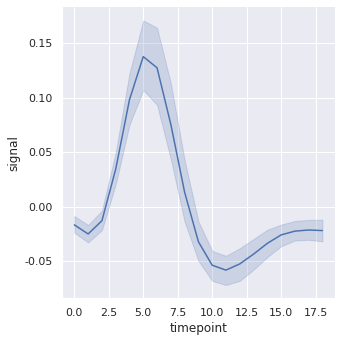

In [ ]:
# 라인 그래프 (신뢰구간 끄기 : ci=None)
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)

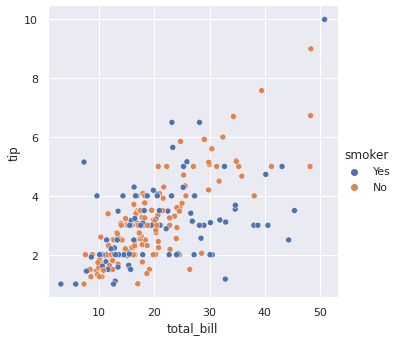

In [ ]:
# 산점도 그래프
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

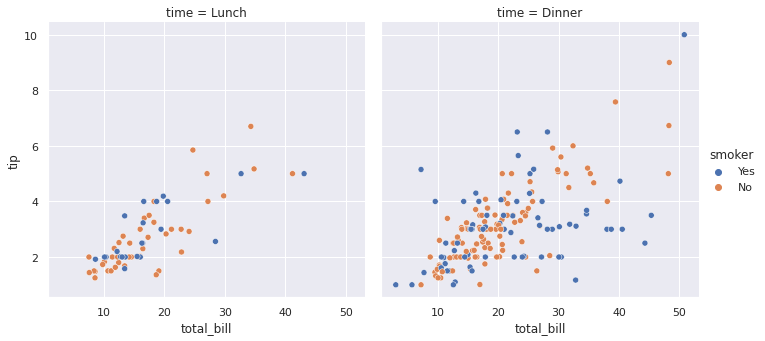

In [ ]:
# 산점도 그래프 (컬럼 나누기)
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

> **lmplot()**
> - lmplot은 **linear model plot** 의 약자입니다.
> - 데이터에 **적합된 회귀선을 같이 표현**할 수 있습니다.

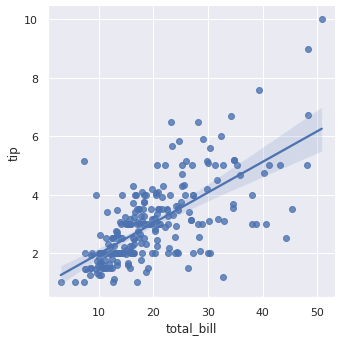

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips)

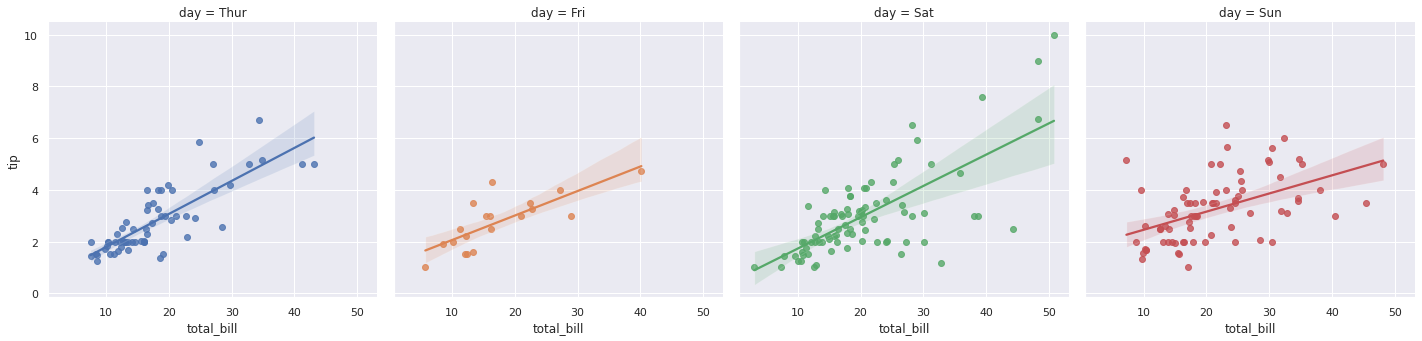

In [ ]:
# 요일 구분
sns.lmplot(x='total_bill', y='tip', hue='day', col='day', data=tips)

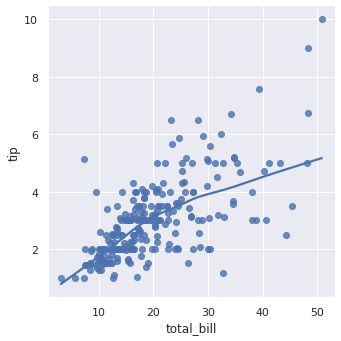

In [ ]:
# 다른 추세선도 가능합니다.
sns.lmplot(x='total_bill', y='tip', lowess=True, data=tips)

> **countplot()**
> - 카테고리별 데이터 값을 셀 수 있습니다.
> - **별도의 집계 코드를 작성하지 않아도 되어**, 손쉽게 사용할 수 있습니다.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


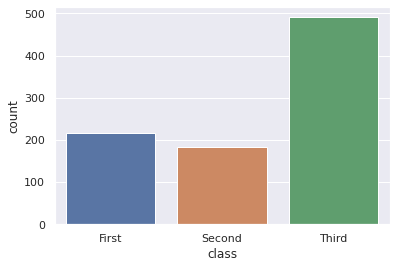

In [ ]:
sns.countplot(x="class", data=titanic)
plt.show()

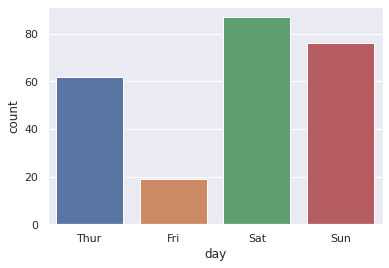

In [ ]:
sns.countplot(x="day", data=tips)
plt.show()

> **distplot()**
> - **히스토그램**을 그릴 때 사용합니다.
> - 러그나 커널 밀도와 같이 **추정된 확률 밀도 함수 표시 기능**이 있습니다.

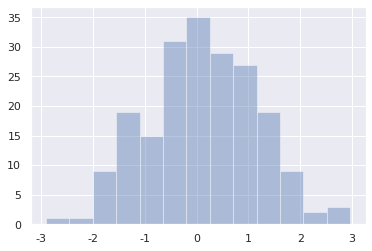

In [ ]:
# 커널 밀도 함수 끄기
x = np.random.randn(200)
sns.distplot(x, kde=False)

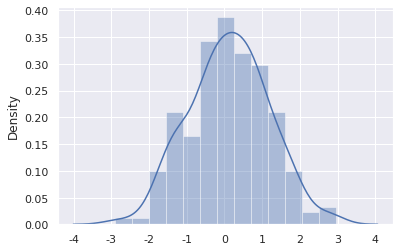

In [ ]:
# 커널 밀도 함수 켜기
axes = sns.distplot(x, kde=True)

In [ ]:
axes.get_lines()

<a list of 1 Line2D objects>

> **heatmap()**
> - **데이터의 상관관계**나 **pivot 테이블을 시각화** 하고 싶을 경우 자주 사용합니다.

In [ ]:
# 상관관계 구하기
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


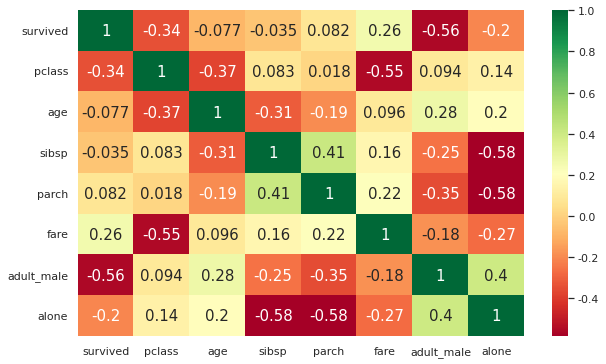

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(), annot=True, cmap='RdYlGn')

> **catplot()**
> - **categrical plot** 의 약자로, 카테고리형 변수를 시각화 할 때 주로 사용합니다.

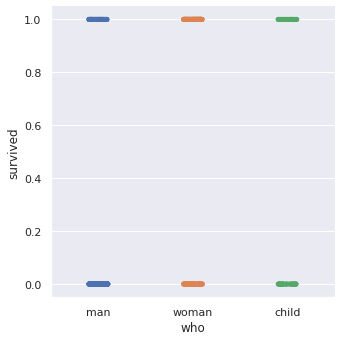

In [ ]:
sns.catplot(x="who", y="survived", data=titanic)

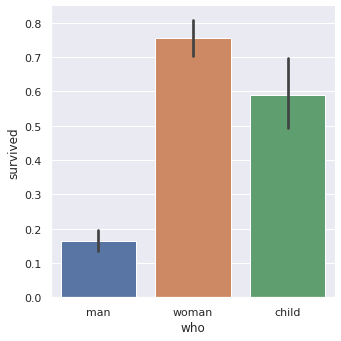

In [ ]:
# 차트 종류를 bar 형태로 변경하면 자동으로 확률이 계산됩니다.
sns.catplot(x="who", y="survived", data=titanic, kind="bar")

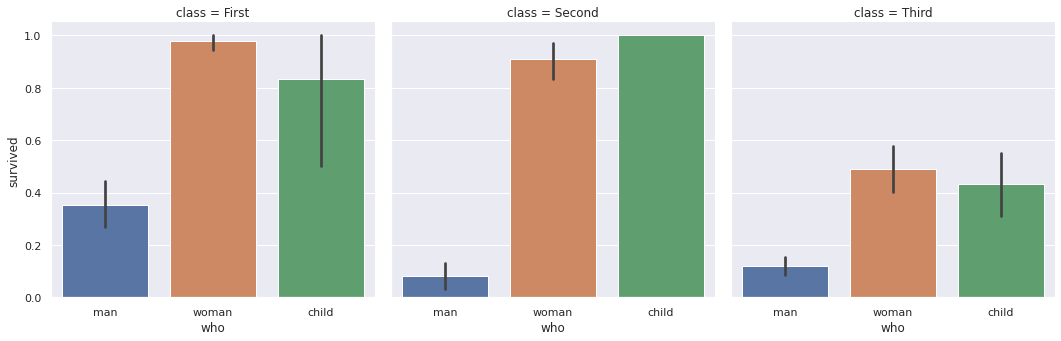

In [ ]:
sns.catplot(x="who", y="survived", col="class", data=titanic, kind="bar")

> ###  **4-6-2. 다차원 그래프**

> **pairplot()**
> - pairplot 은 **데이터 차원이 여러개인 경우**, 한번에 **산점도와 히스토그램을 확인**하고 싶을 경우 사용합니다.
> - 데이터의 상관관계를 한눈에 확인하고 싶을 때 매우 유용합니다.

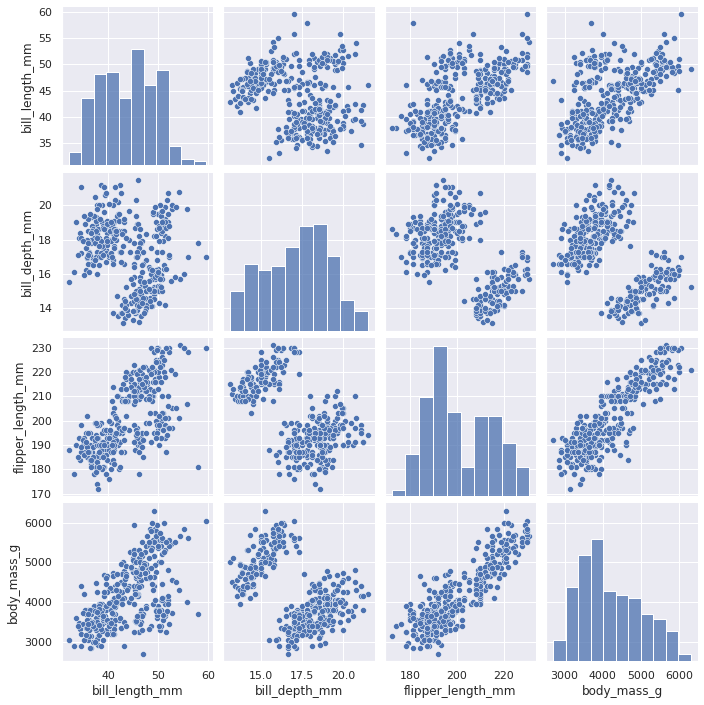

In [ ]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

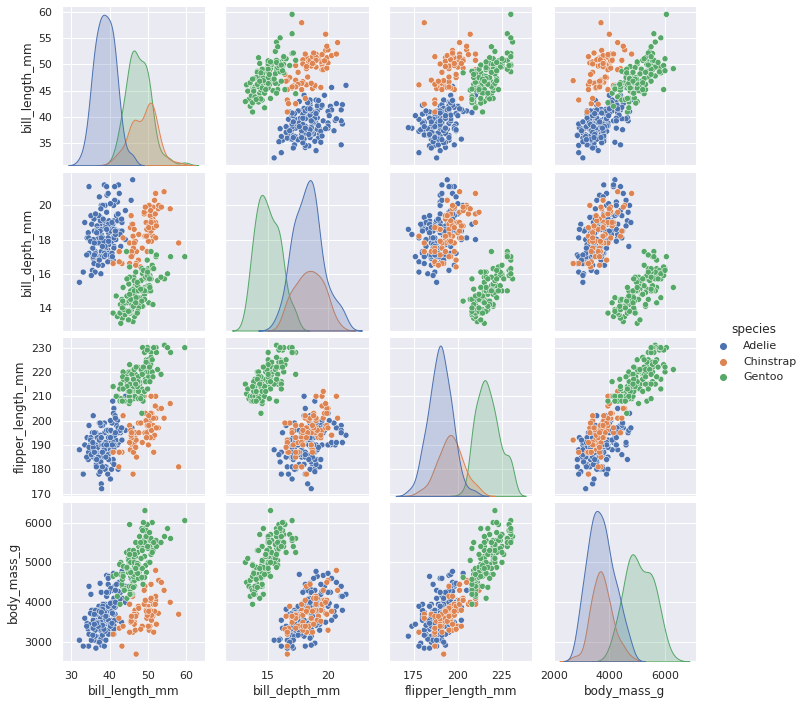

In [ ]:
sns.pairplot(penguins, hue="species")

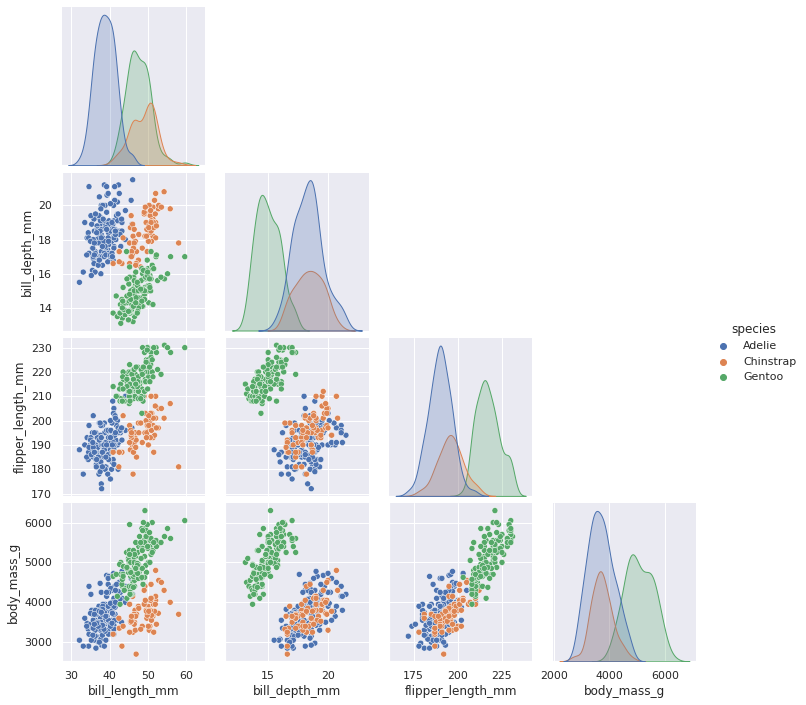

In [ ]:
sns.pairplot(penguins, hue="species", corner=True)

> ###  **4-6-3. 복합 그래프**

> **jointplot()**
> - jointplot 은 **산점도(scatter) 와 히스토그램(histogram)** 을 한번에 그릴 수 있는 방법입니다.

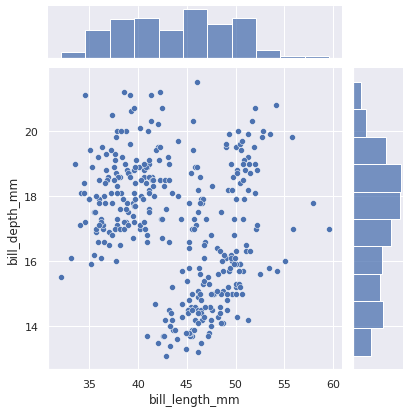

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

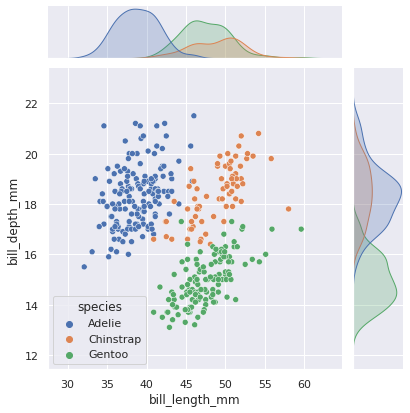

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

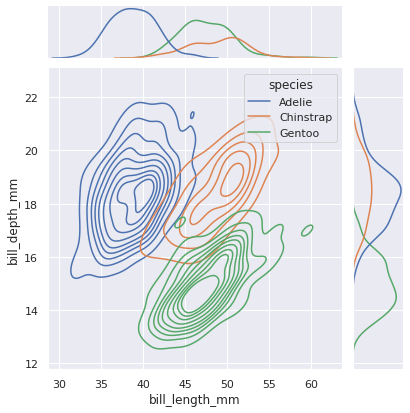

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")